<a href="https://colab.research.google.com/github/lpaolariosm/Ecuaciones-Diferenciales-Parciales-I/blob/main/Copia_de_GRAFICAS_SYMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Ecuacion logIstica:
$dp/dt=ap-bp^2, \;\; p(0)=p_0$

El problema de valor inicial para la ecuacion logistica es ampliamente usado como un modelo crecimiento poblacional. Donde $a$ y $b$ son los coeficientes vitales de la poblacion $p(t)$ y $p_0$ es la poblaci ́on inicial.

In [ ]:
import sympy as sp #Primeramente importamos la libreria SymPy a Python

In [ ]:
#Definimos las variables independiente y dependiente as ́ı como los par ́ametros de forma simb ́olica
t=sp.symbols('t')
p=sp.Function('p(t)')
a=sp.symbols('a')
b=sp.symbols('b')
p0=sp.symbols('p0')

In [ ]:
#Ahora definimos la ecuaci ́on diferencial y la resolvemos con la condici ́on inicial usando dsolve
ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0)
sol = sp.dsolve(ode,p(t),ics={p(0):p0})

In [ ]:
#Obteniendo as ́ı la soluci ́on:
sp.Eq(p(t), a*sp.exp(a*(t + sp.log(b*p0/(-a + b*p0))/a))/(b*(sp.exp(a*(t + sp.log(b*p0/(-a + b*p0))/a)) - 1)))

Eq(p(t)(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

In [ ]:
#Definimos a continuacion los valores de a, b y p0, y evaluamos las respectivas soluciones (una para cada condici ́on inicial):
constants={a:0.03,b:0.0001,p0:5}
sol1=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

In [ ]:
#La funcionlambdifypermite definir una funci ́on a partir de la expresion simbolica:
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

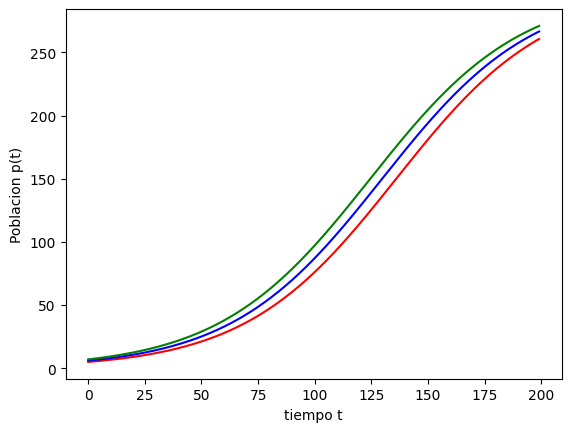

In [ ]:
#A continuacion, importamos los modulosscipy, matplotlibypyplotpara graficar nuestras soluciones:
import scipy as sc
import numpy as np
tt = np.arange(0,200,1)
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()

In [ ]:
from sympy.solvers.ode import classify_ode
classify_ode(ode)

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [ ]:
sol=sp.dsolve(ode,p(t))
sol

Eq(p(t)(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))

In [ ]:
C1=sp.symbols('C1')
sol1=b*(sp.exp(a*(C1+t))-1)
sp.checkodesol(ode,sol1)
(False, b*(a + b**2*(1 - sp.exp(a*(C1 + t)))**2))

(False, b*(a + b**2*(1 - exp(a*(C1 + t)))**2))

#2. Ecuacion de Lagrange
$y=2xy'+log(y').$

In [ ]:
from sympy import *
import sympy as sp
x=sp.symbols('x')
y=sp.Function('y')
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
sol2 = sp.dsolve(ode2,y(x))
Eq(C1-y(x)-log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))),0)

Eq(C1 - y(x) - log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))), 0)

#3. Resonancia
$y''+16y=8sen(4t), \;\;  y(0)=1, \;\; y'(0)=0$

In [ ]:
from sympy import *
import sympy as sp
t=sp.symbols('t')
y=sp.Function('y')
C2=sp.symbols('C2')
ode3=sp.Eq(sp.Derivative(y(t),t,t)+16*y(t)-8*sin(4*t),0)

In [ ]:
#Resolvemos la ecuaci ́on diferencial:
sol3 = sp.dsolve(ode3,y(t))

In [ ]:
#para obtener:
Eq(y(t), C2*sin(4*t) + (C1 - t)*cos(4*t))

Eq(y(t), C2*sin(4*t) + (C1 - t)*cos(4*t))

In [ ]:
#Vamos ahora a definir las condiciones iniciales y substituirlas en la solucion:
const=sp.solve([sol3.rhs.subs(t,0)-1, sol3.rhs.diff(t,1).subs(t,0)-0])
C1, C2 = sp.symbols('C1,C2')
sol3=sol3.subs(const)

In [ ]:
#Definimos una funcion a partir de la soluci ́on simb ́olica obtenida:
func1 = sp.lambdify(t,sol3.rhs,'numpy')

In [ ]:
import scipy
import numpy as np
xx = np.arange(0,10,.1)
yy1 = func1(xx)

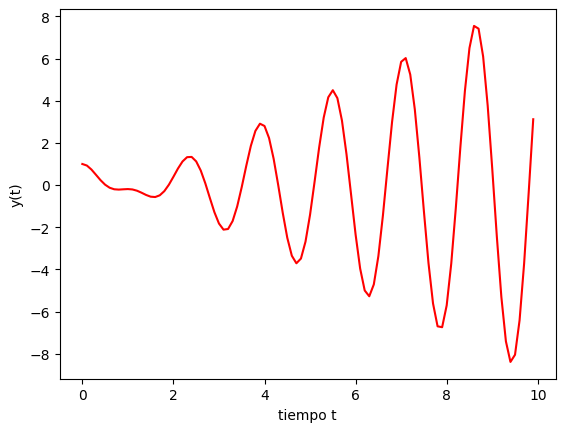

In [ ]:
# Y graficamos con los comandos:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(xx,yy1,'r')
plt.xlabel('tiempo t')
plt.ylabel('y(t)')
plt.show()

#4. Ecuacion de tercer orden
$y'''-y''-y'+y=g(t)$

In [ ]:
from sympy import *
import sympy as sp
t=sp.symbols('t')
y=sp.Function('y')
g=sp.Function('g')
C3=sp.symbols('C3')
ode4=sp.Eq(sp.Derivative(y(t),t,3)-sp.Derivative(y(t),t,t)-sp.Derivative(y(t),t)+y(t)-g(t),0)
sol4 = sp.dsolve(ode4,y(t))

In [ ]:
#Obteniendo ası la solucion
Eq(y(t), (C1 + Integral(g(t)*exp(t), t)/4)*exp(-t)+ (C2 + t*(C3 + Integral(g(t)*exp(-t), t)/2) -Integral((2*t + 1)*g(t)*exp(-t), t)/4)*exp(t))

Eq(y(t), (C1 + Integral(g(t)*exp(t), t)/4)*exp(-t) + (C2 + t*(C3 + Integral(g(t)*exp(-t), t)/2) - Integral((2*t + 1)*g(t)*exp(-t), t)/4)*exp(t))

#5. Una ecuaci ́on homog ́enea de Cauchy-Euler de cuarto orden
$x^4y^{(4)}(x) + 6x^3y^{(3)}(x) + 9x^2y''(x) + 3xy'(x) +y(x) = 0$

In [ ]:
from sympy import *
import sympy as sp
x=sp.symbols('x')
y=sp.Function('y')
C4=sp.symbols('C4')
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)
sol5 = sp.dsolve(ode5,y(x))

In [ ]:
#Para obtener:
Eq(y(x),C3*sin(log(x))+C4*cos(log(x))+ (C1*sin(log(x))+C2*cos(log(x)))*log(x))

Eq(y(x), C3*sin(log(x)) + C4*cos(log(x)) + (C1*sin(log(x)) + C2*cos(log(x)))*log(x))

In [ ]:
#La literatura nos dice que un metodo de solucion de las ecuaciones de Cauchy Euler implica la substitucion y=x^n.En Python podemos usar:
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))
factor(eq)

Eq(x**n*(n**2 + 1)**2, 0)

#6. Un problema de valor inicial con deltas de Dirac como fuentes

$y''(t)-4y'(t) + 4y(t) = 3δ(t-1) +δ(t-2), \;\; y(0) = 1, \;\;  y'(0) = 1$

In [ ]:
from sympy import *
import sympy as sp
t=sp.symbols('t')
y=sp.Function('y')
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))
sol6 = sp.dsolve(ode6)
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
sol6.subs(constants)

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

In [ ]:
#obtenemos
Eq(y(t), (t*(exp(-4)*Heaviside(t-2)+3*exp(-2)*Heaviside(t-1)-1)-2*exp(-4)*Heaviside(t-2) - 3*exp(-2)*Heaviside(t-1)+1)*exp(2*t))

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

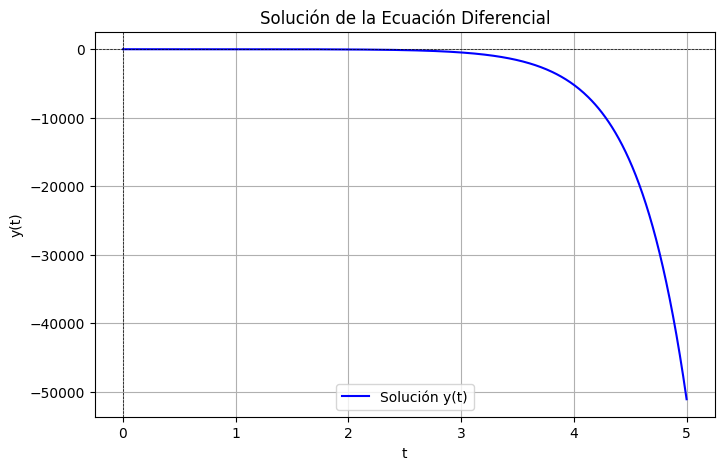

In [ ]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Manejar expresiones simbólicas correctamente
y_simplified = sol6.rhs.simplify()
f_lambdified = lambdify(t, y_simplified, modules=['numpy', 'sympy'])

# Crear valores para la gráfica
t_values = np.linspace(0, 5, 500)
y_values = np.array([float(f_lambdified(val)) for val in t_values])

# Graficar la solución
plt.figure(figsize=(8, 5))
plt.plot(t_values, y_values, label='Solución y(t)', color='b')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la Ecuación Diferencial')
plt.legend()
plt.grid()
plt.show()




#7. Sistema masa-resorte

$mx''(t) +ke^{-αt}x(t) = 0$

In [ ]:
from sympy import *
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')
m, k, a = sp.symbols('m k a', real=True, positive=True)

ode7 = sp.Eq(m * sp.Derivative(y(t), t, t) + k * sp.exp(-a * t) * y(t), 0)
sol7 = sp.dsolve(ode7, y(t))

In [ ]:
#Para obtener la ecuacion:
Eq(y(t),C2*(k**2*t**4*exp(-2*a*t)/(24*m**2)-k*t**2*exp(-a*t)/(2*m)+1) +C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

Eq(y(t), C2*(k**2*t**4*exp(-2*a*t)/(24*m**2) - k*t**2*exp(-a*t)/(2*m) + 1) + C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

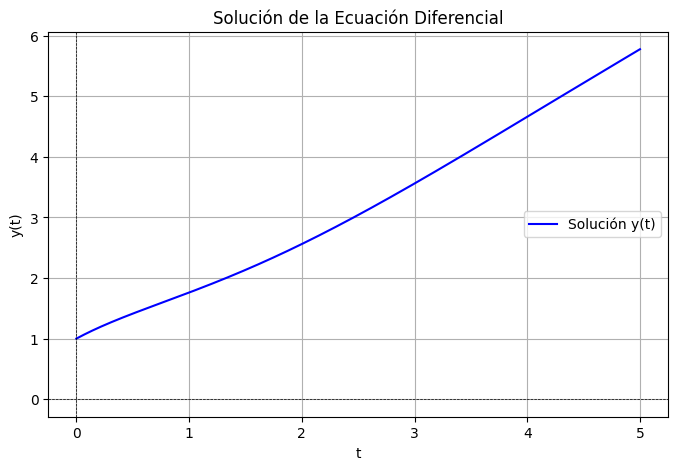

In [ ]:
# Expresión de la solución
sol_exp = C2 * (k**2 * t**4 * sp.exp(-2*a*t) / (24*m**2) - k * t**2 * sp.exp(-a*t) / (2*m) + 1) + C1 * t * (-k * t**2 * sp.exp(-a*t) / (6*m) + 1)

# Convertir la solución en una función numérica
params = {m: 1, k: 1, a: 1, C1: 1, C2: 1}  # Valores arbitrarios para graficar
sol_num = sol_exp.subs(params)
f_lambdified = lambdify(t, sol_num, modules=['numpy', 'sympy'])

# Crear valores para la gráfica
t_values = np.linspace(0, 5, 500)
y_values = np.array([float(f_lambdified(val)) for val in t_values])

# Graficar la solución
plt.figure(figsize=(8, 5))
plt.plot(t_values, y_values, label='Solución y(t)', color='b')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la Ecuación Diferencial')
plt.legend()
plt.grid()
plt.show()


#9. Ecuacion de Airy

$y''(t)-ty(t) = 0$

In [ ]:
from sympy import *
import sympy as sp
t = sp.symbols('t')
y=sp.Function('y')
ode9=sp.Eq(sp.Derivative(y(t),t,t)-t*y(t),0)
sol9=dsolve(ode9,y(t))

In [ ]:
#Obtenemos ası una solucion que incluye funciones de Airy
Eq(y(t), C1*airyai(t) + C2*airybi(t))

Eq(y(t), C1*airyai(t) + C2*airybi(t))

In [ ]:
#Vamos ahora a hallar una solucion en series de potencias centradas en cero
sols9 = sp.dsolve(ode9,hint='2nd_power_series_ordinary')
constants=solve([sols9.rhs.subs(t,0)-1,sols9.rhs.diff(t,1).subs(t,0)-1])
ysol=expand(sols9.rhs.subs(constants))

In [ ]:
#Y ası obtenemos
1 + t + t**3/6 + t**4/12 + O(t**6)

1 + t + t**3/6 + t**4/12 + O(t**6)

In [ ]:
#Calculemos ahora una solucion en series de potencias centradas ent= 1
s9=simplify(series(sol9.rhs,t,1))
constants=solve([s9.subs(t,1)-1,s9.diff(t,1).subs(t,1)-1])
ss9=s9.subs(constants)
simplify(series(ss9,t,1,6))

(t - 1)**2/2 + (t - 1)**3*airyaiprime(1)*airybi(1)/(3*airyaiprime(1)*airybi(1) - 3*airyai(1)*airybiprime(1)) - (t - 1)**3*airyai(1)*airybiprime(1)/(3*airyaiprime(1)*airybi(1) - 3*airyai(1)*airybiprime(1)) + (t - 1)**4*airyaiprime(1)*airybi(1)/(8*airyaiprime(1)*airybi(1) - 8*airyai(1)*airybiprime(1)) - (t - 1)**4*airyai(1)*airybiprime(1)/(8*airyaiprime(1)*airybi(1) - 8*airyai(1)*airybiprime(1)) + (t - 1)**5*airyaiprime(1)*airybi(1)/(24*airyaiprime(1)*airybi(1) - 24*airyai(1)*airybiprime(1)) - (t - 1)**5*airyai(1)*airybiprime(1)/(24*airyaiprime(1)*airybi(1) - 24*airyai(1)*airybiprime(1)) + t*airyaiprime(1)*airybi(1)/(airyaiprime(1)*airybi(1) - airyai(1)*airybiprime(1)) - t*airyai(1)*airybiprime(1)/(airyaiprime(1)*airybi(1) - airyai(1)*airybiprime(1)) + O((t - 1)**6, (t, 1))

In [ ]:
from sympy import symbols
from sympy import series
from sympy import O
from sympy import simplify

t = symbols('t')
expr = (t-1)**2/2 + (t-1)**3/3 + (t-1)**4/8 + (t-1)**5/24 + \
       t * airy_ai(1) * airy_bi_prime(1) / (airy_ai_prime(1) * airy_bi(1) - airy_ai(1) * airy_bi_prime(1)) - \
       t * airy_ai(1) * airy_bi_prime(1) / (airy_ai_prime(1) * airy_bi(1) - airy_ai(1) * airy_bi_prime(1)) + \
       O((t-1)**6, (t,1))

print(expr)


ImportError: cannot import name 'airy_ai_prime' from 'sympy' (/usr/local/lib/python3.11/dist-packages/sympy/__init__.py)